In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [2]:
df = pd.read_csv('UCI_Credit_Card.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [4]:
df['EDUCATION'].replace([0,5, 6], 4, inplace=True)

print(df['EDUCATION'].value_counts())

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_2292\533967973.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['EDUCATION'].replace([0,5, 6], 4, inplace=True)


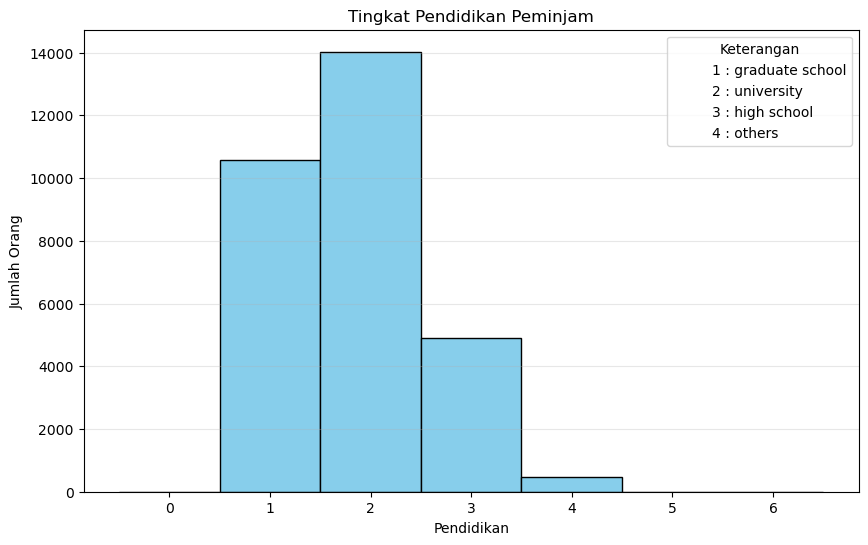

In [6]:
import matplotlib.patches as mpatches 
data = df['EDUCATION']
plt.figure(figsize=(10, 6))


plt.hist(data, bins=range(0, 8), align='left', color='skyblue', edgecolor='black')


handles = [
    mpatches.Patch(color='none', label='1 : graduate school'),
    mpatches.Patch(color='none', label='2 : university'),
    mpatches.Patch(color='none', label='3 : high school'),
    mpatches.Patch(color='none', label='4 : others'),
]

plt.legend(handles=handles, title="Keterangan", loc='upper right')

# 4. Pemanis Grafik
plt.title('Tingkat Pendidikan Peminjam')
plt.xlabel('Pendidikan')
plt.ylabel('Jumlah Orang')
plt.grid(axis='y', alpha=0.3)

plt.show()

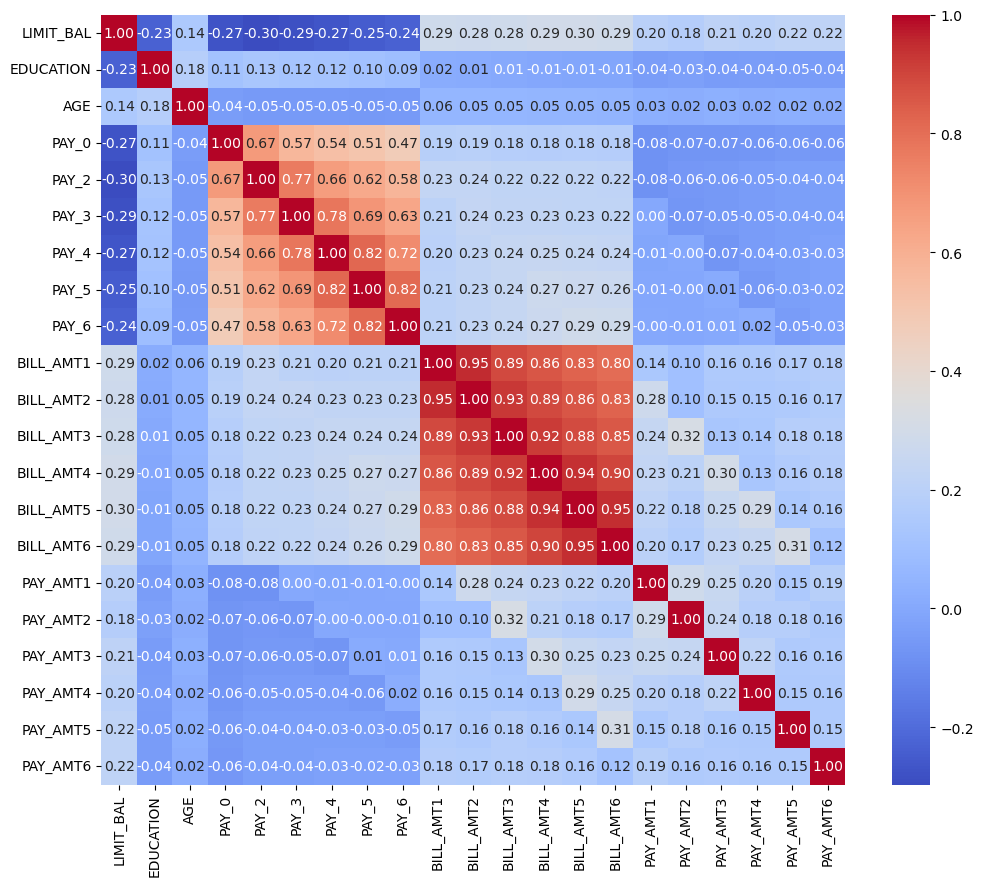

In [5]:
corrdata = df.drop(['ID', 'SEX','MARRIAGE', 'default.payment.next.month'], axis=1)

corr_matrix = corrdata.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.show()

In [6]:
df['AVG_PAY']= df[['PAY_2', 'PAY_3','PAY_4', 'PAY_5','PAY_6']].mean(axis=1)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,AVG_PAY
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,-0.8
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,0.8
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,-0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,0.0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,-0.6
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,0.8
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,-0.4


In [7]:
df['MAX_PAY_DELAY'] = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].max(axis=1)
df['MIN_PAY_DELAY'] = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].min(axis=1)
df['PAY_TREND'] = df['PAY_0'] - df['PAY_6']
df['PAY_CONSISTENCY'] = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].std(axis=1)

In [9]:
df['NUM_LATE_PAYMENTS'] = (df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']] > 0).sum(axis=1)
df['CREDIT_UTILIZATION'] = df['AVG_BILL'] / (df['LIMIT_BAL'] + 1)
df['BILL_PAY_GAP'] = df['AVG_BILL'] - df['AVG_PAYAMT']
df['SEVERE_DELAY'] = (df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']] >= 2).any(axis=1).astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [8]:
df['AVG_BILL']= df[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3','BILL_AMT4', 'BILL_AMT5','BILL_AMT6']].mean(axis=1)
df['BILL_TREND'] = df['BILL_AMT1'] - df['BILL_AMT6']
df['AVG_PAYAMT']= df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3','PAY_AMT4', 'PAY_AMT5','PAY_AMT6']].mean(axis=1)
df['PAYAMT_TREND'] = df['PAY_AMT1'] - df['PAY_AMT6']
df['PAYMENT_RATIO'] = df['AVG_PAYAMT'] / (df['AVG_BILL'] + 1)

In [13]:
df['default.payment.next.month'].value_counts(normalize = True)

default.payment.next.month
0    0.7788
1    0.2212
Name: proportion, dtype: float64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [11]:
print(df.isna().sum())

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
AVG_PAY                       0
MAX_PAY_DELAY                 0
MIN_PAY_DELAY                 0
PAY_TREND                     0
PAY_CONSISTENCY               0
AVG_BILL                      0
BILL_TRE

In [10]:
median_val = df['PAYMENT_RATIO'].median()
df['PAYMENT_RATIO'] = df['PAYMENT_RATIO'].fillna(median_val)
print(df['PAYMENT_RATIO'].isna().sum())

0


In [21]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,default.payment.next.month,...,MIN_PAY_DELAY,PAY_TREND,PAY_CONSISTENCY,NUM_LATE_PAYMENTS,AVG_BILL,AVG_PAYAMT,PAYMENT_RATIO,CREDIT_UTILIZATION,BILL_PAY_GAP,SEVERE_DELAY
0,1,20000.0,2,2,1,24,2,2,-1,1,...,-2,4,1.861899,2,1284.000000,114.833333,0.089364,0.064197,1169.166667,1
1,2,120000.0,2,2,2,26,-1,2,0,1,...,-1,-3,1.224745,2,2846.166667,833.333333,0.292689,0.023718,2012.833333,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,0,0,0.000000,0,16942.166667,1836.333333,0.108382,0.188244,15105.833333,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,0,0,0.000000,0,38555.666667,1398.000000,0.036258,0.771098,37157.666667,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,-1,-1,0.516398,0,18223.166667,9841.500000,0.540025,0.364456,8381.666667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,0,0,0.000000,0,120891.500000,7091.666667,0.058661,0.549504,113799.833333,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,0,...,-1,-1,0.516398,0,3530.333333,2415.000000,0.683878,0.023535,1115.333333,0
29997,29998,30000.0,1,2,2,37,4,3,2,1,...,-1,4,1.966384,3,11749.333333,5216.666667,0.443959,0.391631,6532.666667,1
29998,29999,80000.0,1,3,1,41,1,-1,0,1,...,-1,2,0.752773,1,44435.166667,24530.166667,0.552032,0.555433,19905.000000,0


In [15]:
# Daftar kolom yang harus dibuang karena sudah ada penggantinya
cols_to_drop = [
    'ID', 'SEX', 'MARRIAGE', 'AGE', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',         # Tidak berguna untuk prediksi
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', # Sudah diwakili AVG_BILL & BILL_TREND
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6' # Sudah diwakili AVG_PAYAMT & PAYAMT_TREND
]

# Eksekusi drop
df_knn = df.drop(columns=cols_to_drop)
df_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   EDUCATION                   30000 non-null  int64  
 2   PAY_0                       30000 non-null  int64  
 3   default.payment.next.month  30000 non-null  int64  
 4   AVG_PAY                     30000 non-null  float64
 5   MAX_PAY_DELAY               30000 non-null  int64  
 6   MIN_PAY_DELAY               30000 non-null  int64  
 7   PAY_TREND                   30000 non-null  int64  
 8   PAY_CONSISTENCY             30000 non-null  float64
 9   AVG_BILL                    30000 non-null  float64
 10  BILL_TREND                  30000 non-null  float64
 11  AVG_PAYAMT                  30000 non-null  float64
 12  PAYAMT_TREND                30000 non-null  float64
 13  PAYMENT_RATIO               300

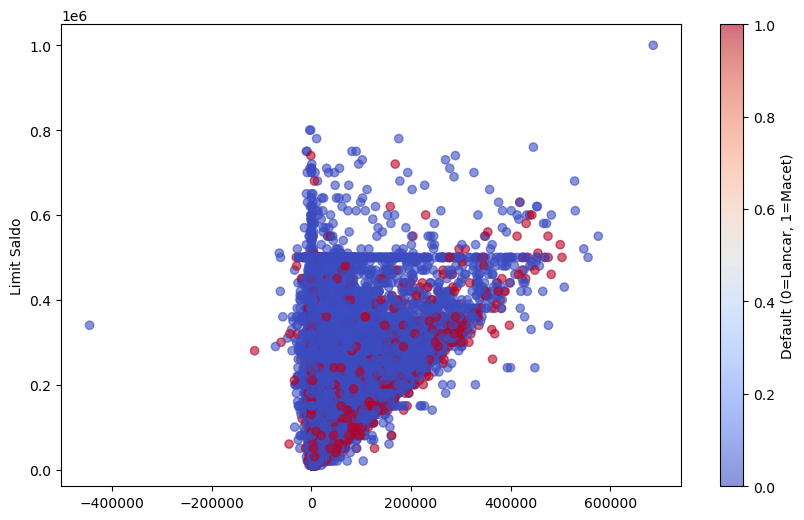

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(x=df['BILL_PAY_GAP'], y=df['LIMIT_BAL'], c=df['default.payment.next.month'], cmap='coolwarm', alpha=0.6)

plt.ylabel('Limit Saldo')
plt.colorbar(label='Default (0=Lancar, 1=Macet)')
plt.show()

In [22]:
df_knn = df_knn.drop(['NUM_LATE_PAYMENTS', 'BILL_PAY_GAP', 'AVG_PAY', 'MAX_PAY_DELAY'], axis = 1)

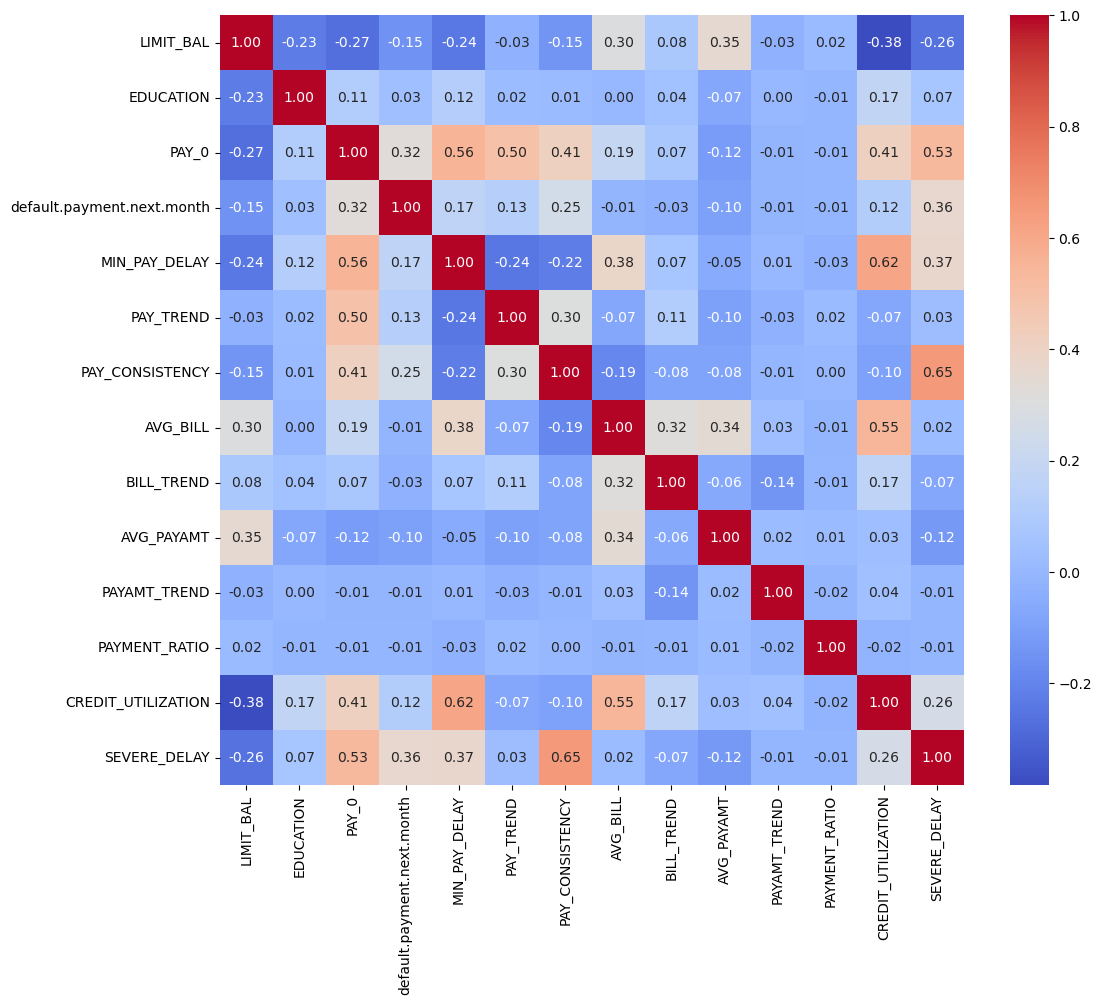

In [23]:
corr_matrix =df_knn.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.show()

In [24]:
X = df_knn.drop('default.payment.next.month', axis = 1)
y = df_knn['default.payment.next.month']

In [19]:
X.shape

(30000, 13)

In [16]:
print(y.value_counts(normalize=True))

default.payment.next.month
0    0.7788
1    0.2212
Name: proportion, dtype: float64


In [20]:
print(df['default.payment.next.month'].value_counts())
print(df['default.payment.next.month'].value_counts(normalize=True))

default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64
default.payment.next.month
0    0.7788
1    0.2212
Name: proportion, dtype: float64


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay, accuracy_score, f1_score

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.1, 
                                                    random_state = 42, 
                                                    stratify = y)

In [27]:
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.decomposition import PCA

In [32]:
param_grid = {
    'knn__n_neighbors': [5,7,9, 11],
    'knn__weights': ['uniform'],  
    'knn__metric': ['manhattan', 'euclidean']
}

In [33]:
pipeline = Pipeline([
    ('yeo', PowerTransformer(method='yeo-johnson')),
    ('scaler', MinMaxScaler()),
    ('knn', KNeighborsClassifier())
])

In [34]:
grid_search = GridSearchCV(
    pipeline, 
    param_grid, 
    cv=5, 
    scoring='recall',
    n_jobs=-1,
    verbose=1
)

In [35]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('yeo', PowerTransformer()),
                                       ('scaler', MinMaxScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['manhattan', 'euclidean'],
                         'knn__n_neighbors': [5, 7, 9, 11],
                         'knn__weights': ['uniform']},
             scoring='recall', verbose=1)

In [36]:
print(f"Best params: {grid_search.best_params_}")
print(f"Best F1 Score: {grid_search.best_score_:.4f}")

Best params: {'knn__metric': 'manhattan', 'knn__n_neighbors': 5, 'knn__weights': 'uniform'}
Best F1 Score: 0.3716


In [38]:
best_model = grid_search.best_estimator_
best_model

Pipeline(steps=[('yeo', PowerTransformer()), ('scaler', MinMaxScaler()),
                ('knn', KNeighborsClassifier(metric='manhattan'))])

In [43]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7965

In [40]:
y_prob = best_model.predict_proba(X_test)[:, 1]
y_prob

array([0. , 0.4, 0.2, ..., 0. , 0. , 0. ], shape=(6000,))

In [41]:
print(classification_report(y_test, y_pred)) #KNN

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      4673
           1       0.56      0.38      0.45      1327

    accuracy                           0.80      6000
   macro avg       0.70      0.65      0.66      6000
weighted avg       0.78      0.80      0.78      6000



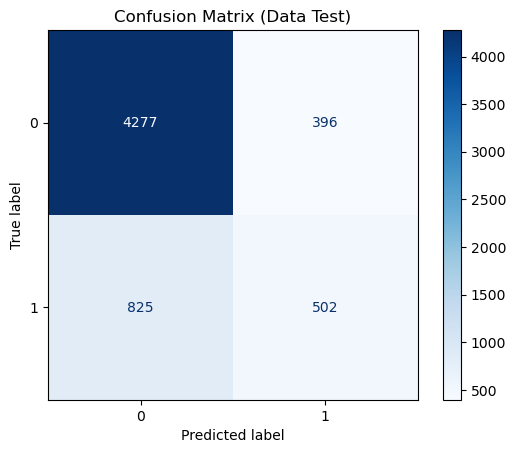

In [75]:
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix (Data Test)")
plt.show()

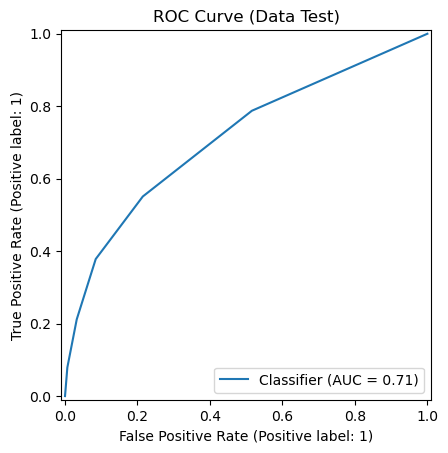

In [76]:
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title("ROC Curve (Data Test)")
plt.show()

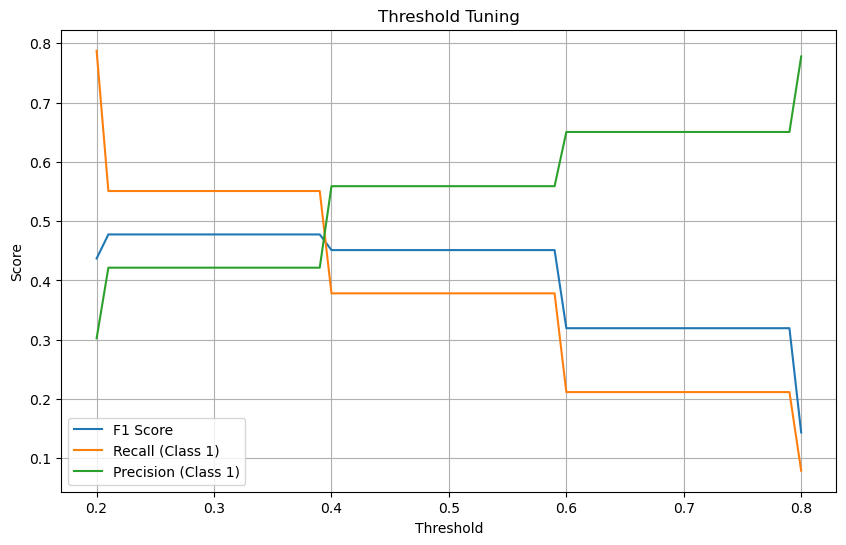


Best Threshold: 0.21
F1 Score: 0.4776
Recall (Class 1): 0.5509
Precision (Class 1): 0.4216

Classification Report with Optimized Threshold(KNN) tanpa PCA dan Borderline:
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      4673
           1       0.42      0.55      0.48      1327

    accuracy                           0.73      6000
   macro avg       0.64      0.67      0.65      6000
weighted avg       0.76      0.73      0.75      6000



In [44]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score, precision_score
y_proba = best_model.predict_proba(X_test)[:, 1]

thresholds = np.arange(0.2, 0.8, 0.01)
f1_scores = []
recalls = []
precisions = []

for threshold in thresholds:
    y_pred_tuned = (y_proba >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred_tuned)
    recall = recall_score(y_test, y_pred_tuned)
    precision = precision_score(y_test, y_pred_tuned)
    
    f1_scores.append(f1)
    recalls.append(recall)
    precisions.append(precision)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.plot(thresholds, recalls, label='Recall (Class 1)')
plt.plot(thresholds, precisions, label='Precision (Class 1)')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Threshold Tuning')
plt.grid()
plt.show()

best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
print(f"\nBest Threshold: {best_threshold:.2f}")
print(f"F1 Score: {f1_scores[best_idx]:.4f}")
print(f"Recall (Class 1): {recalls[best_idx]:.4f}")
print(f"Precision (Class 1): {precisions[best_idx]:.4f}")

y_pred_optimized_knn = (y_proba >= 0.21).astype(int)
print("\nClassification Report with Optimized Threshold(KNN) tanpa PCA dan Borderline:")
print(classification_report(y_test, y_pred_optimized_knn))

<Figure size 800x600 with 0 Axes>

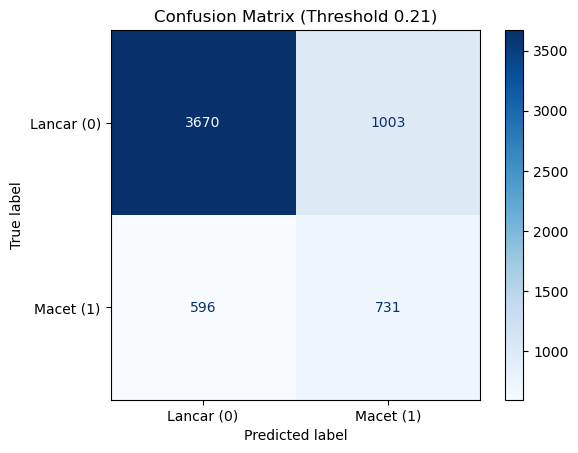

In [45]:
from sklearn.metrics import confusion_matrix

cm0 = confusion_matrix(y_test, y_pred_optimized_knn)

disp = ConfusionMatrixDisplay(confusion_matrix=cm0, display_labels=['Lancar (0)', 'Macet (1)'])
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix (Threshold 0.21)")
plt.show()

In [46]:
X = df.drop('default.payment.next.month', axis = 1)
y = df['default.payment.next.month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42, stratify = y)

In [47]:
param_grid = {
    'knn__n_neighbors': [7,9, 11],
    'knn__weights': ['uniform'],  
    'knn__metric': ['manhattan'],
    'smote__k_neighbors': [5, 10],
    'smote__m_neighbors': [5, 10],
    'smote__kind': ['borderline-1', 'borderline-2']
}
pipeline = ImbPipeline([
    ('smote', BorderlineSMOTE(random_state=42)),
    ('yeo', PowerTransformer(method='yeo-johnson')),
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components=0.95,random_state = 42)),
    ('knn', KNeighborsClassifier())
])
grid_search_knn_fix = GridSearchCV(
    pipeline, 
    param_grid, 
    cv=5, 
    scoring='recall',
    n_jobs=-1,
    verbose=1
)

In [48]:
grid_search_knn_fix.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote',
                                        BorderlineSMOTE(random_state=42)),
                                       ('yeo', PowerTransformer()),
                                       ('scaler', MinMaxScaler()),
                                       ('pca',
                                        PCA(n_components=0.95,
                                            random_state=42)),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['manhattan'],
                         'knn__n_neighbors': [7, 9, 11],
                         'knn__weights': ['uniform'],
                         'smote__k_neighbors': [5, 10],
                         'smote__kind': ['borderline-1', 'borderline-2'],
                         'smote__m_neighbors': [5, 10]},
             scoring='recall', verbose=1)

In [49]:
best_modelknn = grid_search_knn_fix.best_estimator_
best_modelknn

Pipeline(steps=[('smote', BorderlineSMOTE(random_state=42)),
                ('yeo', PowerTransformer()), ('scaler', MinMaxScaler()),
                ('pca', PCA(n_components=0.95, random_state=42)),
                ('knn',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=11))])

In [50]:
print(f"Best params: {grid_search_knn_fix.best_params_}")
print(f"Best F1 Score: {grid_search_knn_fix.best_score_:.4f}")

Best params: {'knn__metric': 'manhattan', 'knn__n_neighbors': 11, 'knn__weights': 'uniform', 'smote__k_neighbors': 5, 'smote__kind': 'borderline-1', 'smote__m_neighbors': 10}
Best F1 Score: 0.5847


In [51]:
y_predf = grid_search_knn_fix.predict(X_test)
y_probf = grid_search_knn_fix.predict_proba(X_test)[:, 1]

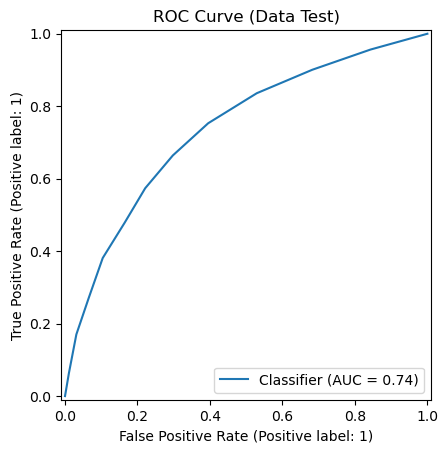

In [101]:
RocCurveDisplay.from_predictions(y_test, y_probf)
plt.title("ROC Curve (Data Test)")
plt.show()

In [52]:
print(classification_report(y_test, y_predf)) #KNN

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      2336
           1       0.42      0.57      0.49       664

    accuracy                           0.73      3000
   macro avg       0.64      0.68      0.65      3000
weighted avg       0.77      0.73      0.75      3000



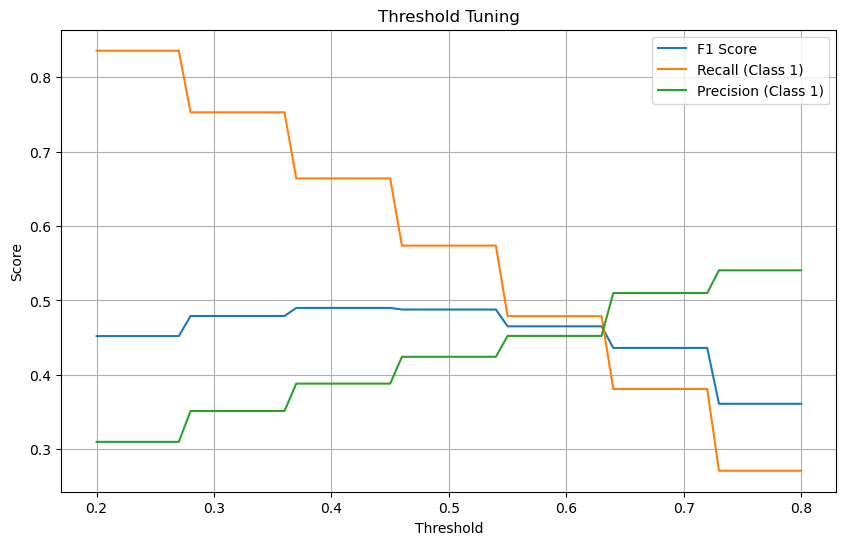


Best Threshold: 0.37
F1 Score: 0.4900
Recall (Class 1): 0.6642
Precision (Class 1): 0.3882

Classification Report with Optimized Threshold(KNN) with BorderlineSMOTE dan PCA:
              precision    recall  f1-score   support

           0       0.88      0.70      0.78      2336
           1       0.39      0.66      0.49       664

    accuracy                           0.69      3000
   macro avg       0.63      0.68      0.64      3000
weighted avg       0.77      0.69      0.72      3000



In [53]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score, precision_score
thresholds = np.arange(0.2, 0.8, 0.01)
f1_scores = []
recalls = []
precisions = []

for threshold in thresholds:
    y_pred_tuned = (y_probf >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred_tuned)
    recall = recall_score(y_test, y_pred_tuned)
    precision = precision_score(y_test, y_pred_tuned)
    
    f1_scores.append(f1)
    recalls.append(recall)
    precisions.append(precision)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.plot(thresholds, recalls, label='Recall (Class 1)')
plt.plot(thresholds, precisions, label='Precision (Class 1)')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Threshold Tuning')
plt.grid()
plt.show()

best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
print(f"\nBest Threshold: {best_threshold:.2f}")
print(f"F1 Score: {f1_scores[best_idx]:.4f}")
print(f"Recall (Class 1): {recalls[best_idx]:.4f}")
print(f"Precision (Class 1): {precisions[best_idx]:.4f}")

y_pred_optimized_knn = (y_probf >= 0.37).astype(int)
print("\nClassification Report with Optimized Threshold(KNN) with BorderlineSMOTE dan PCA:")
print(classification_report(y_test, y_pred_optimized_knn))

<Figure size 800x600 with 0 Axes>

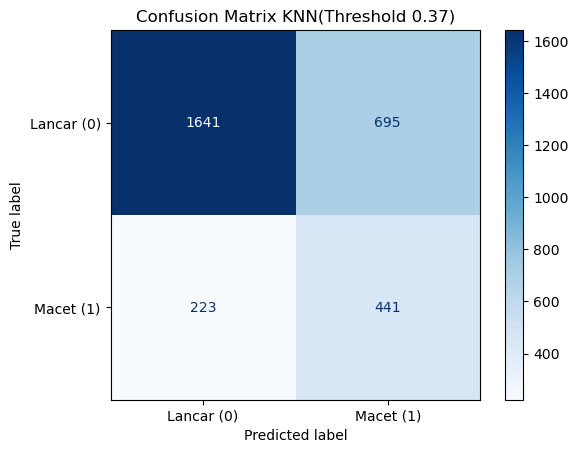

In [100]:
from sklearn.metrics import confusion_matrix

cmff= confusion_matrix(y_test, y_pred_optimized_knn)

disp = ConfusionMatrixDisplay(confusion_matrix=cmff, display_labels=['Lancar (0)', 'Macet (1)'])
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix KNN(Threshold 0.37)")
plt.show()

In [71]:
df_nb = df_knn
df_nb

,LIMIT_BAL,EDUCATION,PAY_0,default.payment.next.month,MIN_PAY_DELAY,PAY_TREND,PAY_CONSISTENCY,AVG_BILL,BILL_TREND,AVG_PAYAMT,PAYAMT_TREND,PAYMENT_RATIO,CREDIT_UTILIZATION,SEVERE_DELAY
0,20000.0,2,2,1,-2,4,1.861899,1284.000000,3913.0,114.833333,0.0,0.089364,0.064197,1
1,120000.0,2,-1,1,-1,-3,1.224745,2846.166667,-579.0,833.333333,-2000.0,0.292689,0.023718,1
2,90000.0,2,0,0,0,0,0.000000,16942.166667,13690.0,1836.333333,-3482.0,0.108382,0.188244,0
3,50000.0,2,0,0,0,0,0.000000,38555.666667,17443.0,1398.000000,1000.0,0.036258,0.771098,0
4,50000.0,2,-1,0,-1,-1,0.516398,18223.166667,-10514.0,9841.500000,1321.0,0.540025,0.364456,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,3,0,0,0,0,0.000000,120891.500000,172968.0,7091.666667,7500.0,0.058661,0.549504,0
29996,150000.0,3,-1,0,-1,-1,0.516398,3530.333333,1683.0,2415.000000,1837.0,0.683878,0.023535,0
29997,30000.0,2,4,1,-1,4,1.966384,11749.333333,-15792.0,5216.666667,-3100.0,0.443959,0.391631,1
29998,80000.0,3,1,1,-1,2,0.752773,44435.166667,-50589.0,24530.166667,84096.0,0.552032,0.555433,0


In [72]:
X= df_nb.drop('default.payment.next.month', axis = 1)
y= df_nb['default.payment.next.month']

In [73]:
X.shape

(30000, 13)

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
pipeline2 = ImbPipeline([
    ('transformer', PowerTransformer(method='yeo-johnson')),
    ('pca', PCA(n_components=0.95,random_state = 42)),
    ('minmax', MinMaxScaler()),
    ('nb', GaussianNB())
])

params_grid = {
    'nb__var_smoothing': [1e-11,1e-10],
}
grid_search_nb_last = GridSearchCV(
    pipeline2, 
    params_grid, 
    cv=5, 
    scoring='recall',
    n_jobs=-1,
    verbose=1
)

grid_search_nb_last.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer', PowerTransformer()),
                                       ('pca',
                                        PCA(n_components=0.95,
                                            random_state=42)),
                                       ('minmax', MinMaxScaler()),
                                       ('nb', GaussianNB())]),
             n_jobs=-1, param_grid={'nb__var_smoothing': [1e-11, 1e-10]},
             scoring='recall', verbose=1)

In [75]:
print(f"Best params: {grid_search_nb_last.best_params_}")
print(f"Best F1 Score: {grid_search_nb_last.best_score_:.4f}")

Best params: {'nb__var_smoothing': 1e-11}
Best F1 Score: 0.5022


In [76]:
print("Best Params:", grid_search_nb_last.best_params_)

Best Params: {'nb__var_smoothing': 1e-11}


In [77]:
best_model1 = grid_search_nb_last.best_estimator_
best_model1

Pipeline(steps=[('transformer', PowerTransformer()),
                ('pca', PCA(n_components=0.95, random_state=42)),
                ('minmax', MinMaxScaler()),
                ('nb', GaussianNB(var_smoothing=1e-11))])

In [78]:
y_prob1= grid_search_nb_last.predict_proba(X_test)[:, 1]
y_prob1

array([0.4192145 , 0.33176934, 0.20089785, ..., 0.05507059, 0.02604144,
       0.08534158], shape=(3000,))

In [79]:
y_pred1 = best_model1.predict(X_test)
accuracy = accuracy_score(y_test,y_pred1)
accuracy

0.767

In [80]:
print(classification_report(y_test, y_pred1)) #Naive Bayes

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      2336
           1       0.48      0.52      0.50       664

    accuracy                           0.77      3000
   macro avg       0.67      0.68      0.67      3000
weighted avg       0.77      0.77      0.77      3000



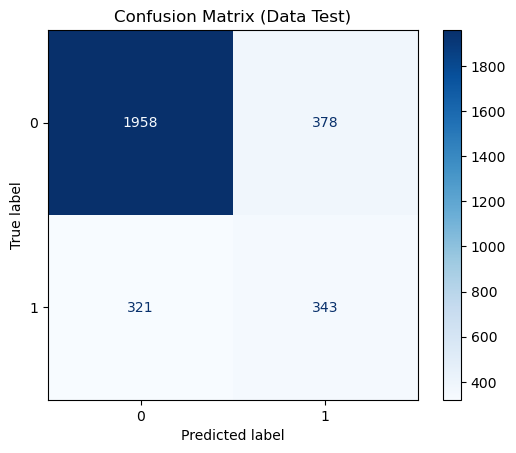

In [81]:
ConfusionMatrixDisplay.from_estimator(best_model1, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix (Data Test)")
plt.show()

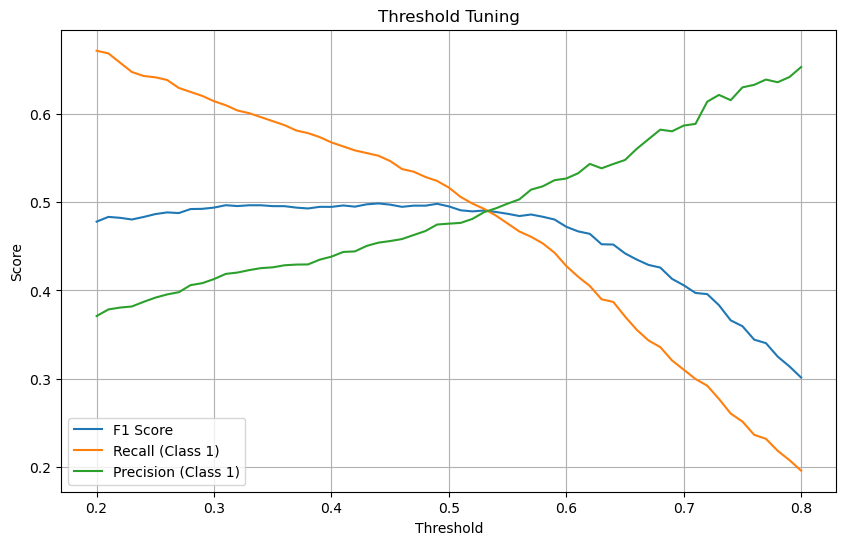


Best Threshold: 0.44
F1 Score: 0.4986
Recall (Class 1): 0.5527
Precision (Class 1): 0.4542

Classification Report with Optimized Threshold(GaussianNB) dengan threshold 0.315:
              precision    recall  f1-score   support

           0       0.87      0.76      0.81      2336
           1       0.42      0.61      0.49       664

    accuracy                           0.73      3000
   macro avg       0.64      0.68      0.65      3000
weighted avg       0.77      0.73      0.74      3000



In [91]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score, precision_score
y_proba1 = best_model1.predict_proba(X_test)[:, 1]

thresholds = np.arange(0.2, 0.8, 0.01)
f1_scores = []
recalls = []
precisions = []

for threshold in thresholds:
    y_pred_tuned = (y_proba1 >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred_tuned)
    recall = recall_score(y_test, y_pred_tuned)
    precision = precision_score(y_test, y_pred_tuned)
    
    f1_scores.append(f1)
    recalls.append(recall)
    precisions.append(precision)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.plot(thresholds, recalls, label='Recall (Class 1)')
plt.plot(thresholds, precisions, label='Precision (Class 1)')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Threshold Tuning')
plt.grid()
plt.show()

best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
print(f"\nBest Threshold: {best_threshold:.2f}")
print(f"F1 Score: {f1_scores[best_idx]:.4f}")
print(f"Recall (Class 1): {recalls[best_idx]:.4f}")
print(f"Precision (Class 1): {precisions[best_idx]:.4f}")

y_pred_optimized_gnb = (y_proba1 >= 0.315).astype(int)
print("\nClassification Report with Optimized Threshold(GaussianNB) dengan threshold 0.315:")
print(classification_report(y_test, y_pred_optimized_gnb))

<Figure size 800x600 with 0 Axes>

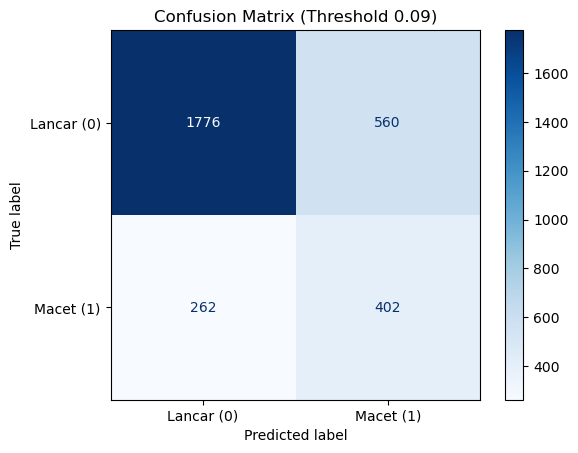

In [92]:
cmg = confusion_matrix(y_test, y_pred_optimized_gnb)

disp = ConfusionMatrixDisplay(confusion_matrix=cmg, display_labels=['Lancar (0)', 'Macet (1)'])
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix (Threshold 0.09)")
plt.show()

In [93]:
from sklearn.naive_bayes import ComplementNB
from sklearn.preprocessing import MinMaxScaler, PowerTransformer, KBinsDiscretizer
from sklearn.decomposition import PCA
pipeline3 = ImbPipeline([
    ('transformer', PowerTransformer(method='yeo-johnson')),
    ('minmax', MinMaxScaler()),
    ('classifier', ComplementNB())
])

param_grid3 = {
    'classifier__alpha': [0.01],
    'classifier__norm': [True]
}

grid_search3 = GridSearchCV(pipeline3, param_grid3, cv=5, scoring='recall',n_jobs=-1,verbose=1)
grid_search3.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer', PowerTransformer()),
                                       ('minmax', MinMaxScaler()),
                                       ('classifier', ComplementNB())]),
             n_jobs=-1,
             param_grid={'classifier__alpha': [0.01],
                         'classifier__norm': [True]},
             scoring='recall', verbose=1)

In [94]:
print(f"Best params: {grid_search3.best_params_}")
print(f"Best F1 Score: {grid_search3.best_score_:.4f}")

Best params: {'classifier__alpha': 0.01, 'classifier__norm': True}
Best F1 Score: 0.6185


In [95]:
best_model2 = grid_search3.best_estimator_
y_pred2 = best_model2.predict(X_test)
accuracy = accuracy_score(y_test,y_pred2)
accuracy

0.7546666666666667

In [96]:
print(classification_report(y_test, y_pred2)) #Naive Bayes

              precision    recall  f1-score   support

           0       0.87      0.80      0.84      2336
           1       0.46      0.59      0.51       664

    accuracy                           0.75      3000
   macro avg       0.66      0.69      0.67      3000
weighted avg       0.78      0.75      0.76      3000



In [98]:
y_prob2= best_model2.predict_proba(X_test)[:, 1]
y_prob2

array([0.50142073, 0.49712224, 0.49791827, ..., 0.49784881, 0.49788327,
       0.49812336], shape=(3000,))

--- HASIL MANUAL Complement Naive Bayes (Threshold: 0.5) ---

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.80      0.84      2336
           1       0.46      0.59      0.51       664

    accuracy                           0.75      3000
   macro avg       0.66      0.69      0.67      3000
weighted avg       0.78      0.75      0.76      3000



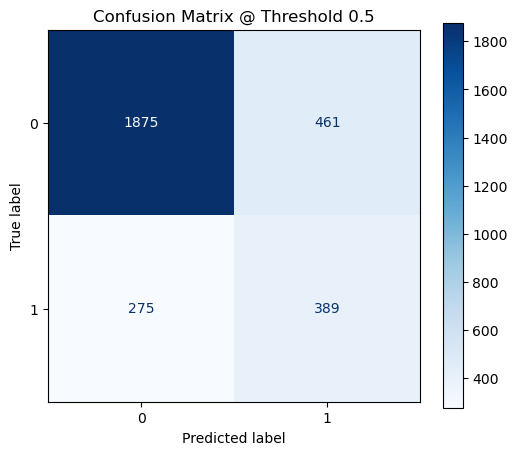

In [99]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

MANUAL_THRESHOLD = 0.5

if y_prob2.ndim == 2:
    prob_positif = y_prob2[:, 1]
else:
    prob_positif = y_prob2

y_pred_manual = (prob_positif >= MANUAL_THRESHOLD).astype(int)

print(f"--- HASIL MANUAL Complement Naive Bayes (Threshold: {MANUAL_THRESHOLD}) ---")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_manual, zero_division=0))

cm = confusion_matrix(y_test, y_pred_manual)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues', values_format='d', ax=plt.gca())
plt.title(f'Confusion Matrix @ Threshold {MANUAL_THRESHOLD}')
plt.grid(False) 
plt.show()

Probabilitas Tertinggi (Max Probability): 0.5048
Rata-rata Probabilitas Kelas 1: 0.4991


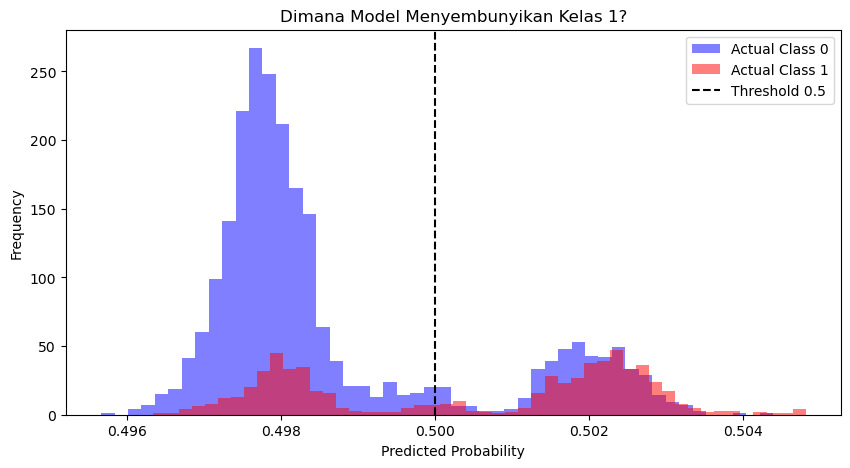

In [118]:
import pandas as pd
import matplotlib.pyplot as plt

if y_prob2.ndim == 2:
    probs = y_prob2[:, 1]
else:
    probs = y_prob2

# Cek nilai maksimumnya
print(f"Probabilitas Tertinggi (Max Probability): {probs.max():.4f}")
print(f"Rata-rata Probabilitas Kelas 1: {probs.mean():.4f}")

# Plot Histogram
plt.figure(figsize=(10, 5))
plt.hist(probs[y_test == 0], bins=50, alpha=0.5, label='Actual Class 0', color='blue')
plt.hist(probs[y_test == 1], bins=50, alpha=0.5, label='Actual Class 1', color='red')
plt.axvline(0.5, color='black', linestyle='--', label='Threshold 0.5')
plt.title('Dimana Model Menyembunyikan Kelas 1?')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Laporan Analisis Perbandingan Model: Prediksi Risiko Kredit

---

## Executive Summary

Laporan ini mengevaluasi performa **4 konfigurasi model** (KNN tanpa PCA/SMOTE, KNN + PCA + BorderlineSMOTE, Gaussian Naive Bayes, Complement Naive Bayes) untuk memprediksi nasabah yang berpotensi gagal bayar (**Default / Class 1**).

**Fokus Utama:** Meminimalkan **False Negative (FN)** karena nasabah default yang lolos berisiko menimbulkan kerugian finansial besar.

---

## 1. Ringkasan Kuantitatif (Post-Evaluasi)

Fokus utama evaluasi adalah **Recall untuk Class 1 (Default)** karena *False Negative* (nasabah default yang lolos) berisiko menimbulkan kerugian finansial besar.

| Metrik | KNN (tanpa PCA & SMOTE) | KNN (PCA + SMOTE) | Gaussian NB | Complement NB |
|:---|:---:|:---:|:---:|:---:|
| **Best Threshold** | 0.21 | 0.37 | 0.15 | 0.5 |
| **Recall (Class 1)** | 0.5509 (55%) | **0.6642 (66%)** | 0.63 (63%) | 0.59 (59%) |
| **Precision (Class 1)** | 0.4216 (42%) | 0.3882 (39%) | 0.42 (42%) | 0.46 (46%) |
| **F1 (Class 1)** | 0.4776 | **0.4900** | ~0.50 | 0.51 |
| **Accuracy** | 0.73 | 0.69 | 0.72 | 0.75 |
| **Test Set Size** | 6000 | 3000 | 3000 | 3000 |
| **Karakteristik** | Moderat | **Paling agresif tangkap default** | Seimbang | Seimbang dengan precision baik |

> **Catatan:** Semua model sudah menggunakan **optimized threshold** untuk performa terbaik.

---

## 2. Simulasi Dampak Finansial

Agar perbandingan adil (karena ukuran test set berbeda), dilakukan simulasi pada populasi yang sama.

### 2.1 Asumsi Simulasi (Dibuat Eksplisit agar Transparan)

**Populasi:**
- Total pemohon: **10.000 orang**
- Proporsi default mengikuti dataset (~22.13%):
  - **Default (Class 1) = 2.213 orang**
  - **Non-default (Class 0) = 7.787 orang**

**Keputusan Bisnis:**
- Prediksi **Class 1 (Default)** → Aplikasi **DITOLAK**
- Prediksi **Class 0 (Non-default)** → Aplikasi **DISETUJUI**

**Nilai Finansial per Kasus:**

| Kasus | Deskripsi | Dampak Finansial |
|:---|:---|---:|
| **FN (False Negative)** | Default yang lolos & disetujui | **-Rp 50.000.000** (KERUGIAN) |
| **TN (True Negative)** | Nasabah baik yang disetujui | **+Rp 5.000.000** (KEUNTUNGAN) |
| **FP (False Positive)** | Nasabah baik yang ditolak | **-Rp 5.000.000** (KEHILANGAN KEUNTUNGAN) |
| **TP (True Positive)** | Default yang ditolak | Rp 0 (Tidak ada dampak langsung) |

### 2.2 Estimasi Confusion Matrix (Skala 10.000 Pemohon)

Perhitungan didapat dari **Recall & Precision Class 1** masing-masing model.

**Formula Perhitungan:**

TP = Recall × Total Default = Recall × 2.213
FN = Total Default - TP = 2.213 - TP
FP = (TP / Precision) - TP
TN = Total Non-default - FP = 7.787 - FP

| Model | TP<br/>(Default Ditolak) | FN<br/>(Default Lolos) | FP<br/>(Baik Ditolak) | TN<br/>(Baik Disetujui) |
|:---|---:|---:|---:|---:|
| KNN (tanpa PCA & SMOTE, thr=0.21) | 1.219 | 994 | 1.672 | 6.115 |
| **KNN (PCA + SMOTE, thr=0.37)** | **1.470** | **743** | **2.317** | **5.470** |
| Gaussian NB (thr=0.15) | 1.394 | 819 | 1.925 | 5.862 |
| Complement NB (thr=0.5) | 1.306 | 907 | 1.532 | 6.255 |

**Interpretasi:**
- **TP (Hijau)**: Semakin tinggi = default berhasil dicegah
- **FN (Merah Paling Kritis)**: Semakin rendah = kerugian finansial minimal
- **FP (Kuning)**: Trade-off dengan FN (lebih baik FP tinggi daripada FN tinggi)
- **TN (Hijau)**: Semakin tinggi = keuntungan maksimal

---

## 3. Perhitungan Finansial per Model

### 3.1 Rumus Perhitungan

Prediksi Kerugian (Loss) = FN × 50.000.000
Prediksi Kehilangan Keuntungan (OppCost) = FP × 5.000.000
Keuntungan dari Nasabah Baik = TN × 5.000.000
Total Dampak Negatif = Loss + OppCost
Net Profit = (TN × 5.000.000) - (FN × 50.000.000)

> **Catatan:** FP tidak masuk Net Profit karena FP adalah "profit yang tidak jadi didapat" (ditampilkan terpisah sebagai kehilangan keuntungan).

### 3.2 Hasil (Dalam **Juta Rupiah**, Skala 10.000 Pemohon)

| Model | Kerugian<br/>dari FN | Kehilangan<br/>Keuntungan (FP) | Keuntungan<br/>dari TN | Total Dampak<br/>Negatif | **Net Profit**<br/>(TN profit - FN loss) |
|:---|---:|---:|---:|---:|---:|
| KNN (tanpa PCA & SMOTE) | 49.700 | 8.360 | 30.575 | 58.060 | **-19.125** |
| **KNN (PCA + SMOTE)** | **37.150** | **11.585** | **27.350** | **48.735**  | **-9.800**  |
| Gaussian NB | 40.950 | 9.625 | 29.310 | 50.575 | **-11.640** |
| Complement NB | 45.350 | 7.660 | 31.275 | 53.010 | **-14.075** |

### 3.3 Interpretasi Inti

**Analisis Kunci:**
1. **KNN (PCA + SMOTE)** memiliki **Net Profit tertinggi (-9.800)** = kerugian paling kecil
2. **KNN (PCA + SMOTE)** memiliki **FN terendah (743)** = default yang lolos paling sedikit
3. **Recall tertinggi (66.42%)** = paling efektif menangkap nasabah default
4. **Trade-off Krusial**: 
   - 1 FN = Kerugian Rp 50 juta
   - 1 FP = Kehilangan keuntungan Rp 5 juta
   - **Rasio: 1 FN = 10 FP** dalam nilai finansial

**Mengapa KNN (PCA + SMOTE) Menang?**
- KNN (PCA + SMOTE): FN 743 × 50 juta = **37.150 juta kerugian** (TERENDAH)
- KNN (PCA + SMOTE): FP 2.317 × 5 juta = **11.585 juta** kehilangan keuntungan
- KNN (PCA + SMOTE): TN 5.470 × 5 juta = **27.350 juta** keuntungan
- **Net Profit = 27.350 - 37.150 = -9.800 juta** (TERBAIK)

**Kesimpulan:** Meskipun FP tinggi (2.317), KNN (PCA + SMOTE) **paling efektif menekan FN** yang memiliki biaya 10x lebih besar, menghasilkan **Net Profit terbaik**.

---

## 4. Ranking Model: Potensi Untung Dikurangi Potensi Rugi

### 4.1 Peringkat Berdasarkan Net Profit

| Ranking | Model | Net Profit<br/>(Juta Rp) | Selisih dari<br/>Terbaik | Status |
|:---:|:---|---:|---:|:---|
| **1** | **KNN (PCA + SMOTE)** | **-9.800** | **—** | **PALING MENGUNTUNGKAN** |
| **2** | **Gaussian NB** | **-11.640** | -1.840 | Alternatif Baik |
| **3** | **Complement NB** | **-14.075** | -4.275 | Cukup Baik |
| **4** | **KNN (tanpa PCA & SMOTE)** | **-19.125** | -9.325 | Kurang Optimal |

### 4.2 Analisis Komparatif Detail

**KNN (PCA + SMOTE) vs Gaussian NB:**
- Selisih Net Profit: **Rp 1.840 juta** lebih menguntungkan
- FN lebih rendah: 819 - 743 = **76 kasus default** lebih tertangkap
- Nilai 76 FN = **Rp 3.800 juta kerugian** yang berhasil dihindari
- Trade-off: FP lebih tinggi 392 kasus = kehilangan keuntungan Rp 1.960 juta
- **Net benefit: Rp 3.800 - 1.960 = Rp 1.840 juta** 

**KNN (PCA + SMOTE) vs Complement NB:**
- Selisih Net Profit: **Rp 4.275 juta** lebih menguntungkan
- FN lebih rendah: 907 - 743 = **164 kasus default** lebih tertangkap
- Nilai 164 FN = **Rp 8.200 juta kerugian** yang berhasil dihindari
- Trade-off: FP lebih tinggi 785 kasus = kehilangan keuntungan Rp 3.925 juta
- **Net benefit: Rp 8.200 - 3.925 = Rp 4.275 juta** 

**KNN (PCA + SMOTE) vs KNN (tanpa preprocessing):**
- Selisih Net Profit: **Rp 9.325 juta** lebih menguntungkan
- FN lebih rendah: 994 - 743 = **251 kasus default** lebih tertangkap
- Nilai 251 FN = **Rp 12.550 juta kerugian** yang berhasil dihindari
- Trade-off: FP lebih tinggi 645 kasus = kehilangan keuntungan Rp 3.225 juta
- **Net benefit: Rp 12.550 - 3.225 = Rp 9.325 juta**
- **PCA + BorderlineSMOTE terbukti SANGAT EFEKTIF** meningkatkan performa

---

## 5. Keputusan Akhir & Rekomendasi

### 5.1 Model yang Paling Menguntungkan

 **Model Terbaik: KNN dengan PCA + BorderlineSMOTE**

**Alasan:**
1. **Net Profit tertinggi** (kerugian paling kecil): **Rp -9.800 juta**
2. **FN terendah** (743 kasus) = default yang lolos paling sedikit
3. **Recall tertinggi (66.42%)** = paling efektif menangkap nasabah default
4. **Total Dampak Negatif paling kecil**: Rp 48.735 juta
5. Lebih menguntungkan **Rp 1.840 juta** dibanding Gaussian NB
6. Lebih menguntungkan **Rp 4.275 juta** dibanding Complement NB
7. Lebih menguntungkan **Rp 9.325 juta** dibanding KNN tanpa preprocessing
8. **PCA + BorderlineSMOTE** terbukti sangat efektif meningkatkan deteksi default

### 5.2 Insight Bisnis Kunci

**Prinsip Fundamental dalam Risiko Kredit:**

1 FN (Nasabah Default Lolos) = Kerugian Rp 50 juta
10 FP (Nasabah Baik Ditolak) = Kehilangan Rp 50 juta
Rasio: 1 FN = 10 FP dalam nilai finansial

**Strategi Optimal:** 
- **Agresif menangkap default** (high recall) TETAPI tidak terlalu ekstrem
- Recall 66% adalah **sweet spot optimal** - lebih tinggi dari alternatif tanpa mengorbankan terlalu banyak nasabah baik
- Menerima FP tinggi (2.317) adalah **trade-off yang worth it** karena FN jauh lebih mahal
- KNN (PCA + SMOTE) mencapai **equilibrium terbaik** untuk profitabilitas maksimal

### 5.3 Rekomendasi Implementasi

**Deploy Model: KNN dengan PCA + BorderlineSMOTE**

**Parameter Optimal:**
- **Threshold: 0.37**
- **Expected Net Loss: Rp 9.800 juta** per 10.000 pemohon
- **Expected FN: 743 kasus** (3.4% dari total pemohon) - TERENDAH
- **Expected FP: 2.317 kasus** (10.5% dari nasabah baik ditolak)
- **Expected TN: 5.470 kasus** (70.2% dari nasabah baik disetujui)
- **Recall Class 1: 66.42%** - TERTINGGI

**Monitoring & Improvement:**
1. **Re-training berkala** (minimal setiap 3 bulan) dengan data terbaru
2. **A/B testing threshold** (coba 0.35 - 0.40) untuk fine-tuning balance FN vs FP
3. **Track metrik kunci:**
   - Recall Class 1 (target minimum: 65%)
   - Precision Class 1 (target minimum: 38%)
   - Net Profit per bulan
   - Actual default rate vs predicted
4. **Cost-sensitive learning** jika rasio kerugian FN:FP berubah
5. **Monitor performa PCA & SMOTE** - pastikan preprocessing tetap efektif
6. Pertimbangkan **ensemble method** (voting/stacking) untuk stabilitas lebih tinggi

### 5.4 Alternatif Model

**2 Gaussian NB** - Backup option jika:
- Ingin model lebih sederhana dan cepat (Naive Bayes lebih ringan dari KNN)
- Bersedia trade-off: Net Profit Rp 1.840 juta lebih rendah
- Threshold optimal: 0.15
- Recall 63%, Precision 42%

**3 Complement NB** - Opsi ketiga jika:
- Ingin balance lebih baik antara precision dan recall
- Bersedia trade-off: Net Profit Rp 4.275 juta lebih rendah
- Threshold optimal: 0.5
- Recall 59%, Precision 46%

---

## 6. Kesimpulan

Berdasarkan simulasi **kerugian (FN)** dan **kehilangan keuntungan (FP)** secara bersamaan pada skala 10.000 pemohon:

 **Model yang paling menguntungkan adalah: KNN dengan PCA + BorderlineSMOTE**

**Key Takeaways:**
1.  **Net Profit TERBAIK**: Rp -9.800 juta (kerugian paling kecil)
2.  **FN TERENDAH**: 743 kasus default yang lolos (paling sedikit)
3.  **Recall TERTINGGI**: 66.42% (paling efektif menangkap default)
4.  Lebih menguntungkan **Rp 1.840 juta** dari Gaussian NB
5.  Lebih menguntungkan **Rp 4.275 juta** dari Complement NB
6.  Lebih menguntungkan **Rp 9.325 juta** dari KNN tanpa preprocessing
7.  **PCA + BorderlineSMOTE** terbukti memberikan improvement signifikan
8.  Trade-off FP tinggi (2.317) **fully justified** karena FN 10x lebih mahal

**Rekomendasi Final:** Deploy **KNN dengan PCA + BorderlineSMOTE** dengan threshold **0.37** sebagai model produksi untuk meminimalkan kerugian finansial secara keseluruhan. Model ini memiliki **recall tertinggi (66.42%)** dan **Net Profit terbaik (Rp -9.800 juta)**, menjadikannya pilihan paling optimal untuk bisnis.

---

**Disclaimer:** Analisis ini berdasarkan asumsi finansial yang telah ditetapkan (FN = Rp 50 juta, FP = Rp 5 juta). Jika nilai kerugian FN atau keuntungan TN berubah, ranking model dapat berubah. Disarankan untuk melakukan **sensitivity analysis** terhadap parameter finansial secara berkala.